In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a simple dataset representing votes with gender info
votes = [
    {"name": "John", "gender": "male", "vote": "Bob"},
    {"name": "Mike", "gender": "male", "vote": "Bob"},
    {"name": "Mikaela", "gender": "female", "vote": "Alice"},
    {"name": "Anna", "gender": "female", "vote": "Alice"},
    {"name": "Daniela", "gender": "female", "vote": "Alice"}
]
votes

[{'name': 'John', 'gender': 'male', 'vote': 'Bob'},
 {'name': 'Mike', 'gender': 'male', 'vote': 'Bob'},
 {'name': 'Mikaela', 'gender': 'female', 'vote': 'Alice'},
 {'name': 'Anna', 'gender': 'female', 'vote': 'Alice'},
 {'name': 'Daniela', 'gender': 'female', 'vote': 'Alice'}]

In [3]:
# Calculate true count of female votes for Alice
true_count = sum(1 for p in votes if p["vote"] == "Alice" and p["gender"] == "female")
true_count

3

In [4]:
# Simulate the effect of varying epsilon on Laplace noise
epsilon = 1.0
sensitivity = 1
scale = sensitivity / epsilon
num_queries = 100

epsilons = np.linspace(0.01, 2.0, num_queries)
noisy_outputs = []

for diff_ep in epsilons:
    new_scale = sensitivity / diff_ep
    noise = np.random.laplace(loc=0.0, scale=new_scale)
    noisy_result = true_count + noise
    noisy_outputs.append(noisy_result)

noisy_outputs

[101.17428770735073,
 -32.59561742341515,
 -13.64206864362728,
 -17.161474939510445,
 5.707539909495431,
 26.843235246607474,
 -11.860255831974401,
 0.7830043826013648,
 18.660656772043872,
 7.791010455638357,
 6.183367930533468,
 4.980477116886218,
 4.564609014238419,
 1.448723975134034,
 -8.711696786004588,
 1.0185426448362764,
 -2.6741713855204106,
 2.7919039433569854,
 5.400162770832913,
 3.908448980501796,
 7.829035758167098,
 4.522351255387559,
 2.9661957121254745,
 3.356191535084161,
 3.768587223831744,
 12.063682912224277,
 2.566856015158961,
 3.0418239463207626,
 2.4472231515420644,
 7.65632110672925,
 -1.9083844689745266,
 -1.2969427921749368,
 4.2473532684598,
 3.6085703810058174,
 2.2655629566413307,
 -0.5022180496918223,
 0.043224171677999745,
 3.353118094661709,
 1.9182247238010948,
 3.5662925877507807,
 4.681974096098411,
 4.661361456410347,
 3.301536103134624,
 2.1749181802089863,
 2.094150358801206,
 3.8662450015310346,
 2.4454396089362653,
 2.6407437243227263,
 2.6738

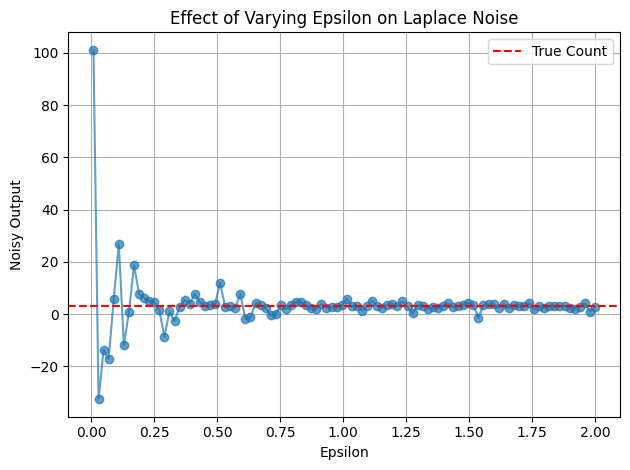

In [5]:
# Plot noisy outputs across varying epsilon values
plt.plot(epsilons, noisy_outputs, marker='o', linestyle='-', alpha=0.7)
plt.axhline(y=true_count, color='red', linestyle='--', label='True Count')
plt.xlabel("Epsilon")
plt.ylabel("Noisy Output")
plt.title("Effect of Varying Epsilon on Laplace Noise")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Simulate a composition attack: repeated queries at fixed epsilon
noisy_counts = []

for _ in range(num_queries):
    noise = np.random.laplace(loc=0.0, scale=scale)
    noisy_count = true_count + noise
    noisy_counts.append(noisy_count)

noisy_counts

[3.2058864368482087,
 2.0326418488396234,
 4.103094599655891,
 1.5005782952261564,
 8.886718273531237,
 4.471795526842006,
 3.573509806733226,
 3.333710953198382,
 3.1439148558098604,
 2.559017038805713,
 2.626532347649742,
 3.524448466824767,
 2.995297367042652,
 1.2249703433670411,
 1.4359065621603906,
 1.280999096973103,
 3.140763986821794,
 4.566996121955926,
 4.713920033312774,
 2.9895297707228945,
 2.8398159133374876,
 2.540803839566939,
 -0.5290026782035775,
 1.0785896363206229,
 4.520415779174348,
 3.7794071743841346,
 -0.4765145000786868,
 3.138065043895063,
 1.2299111399920886,
 4.446490122412003,
 1.4037945261983342,
 3.9017522546595935,
 3.9088847537099647,
 3.5074566429635428,
 2.4443267575451557,
 3.1894589687023123,
 3.0847528825429085,
 2.3812580232848295,
 2.967626897611025,
 4.22059906571948,
 3.423897137497552,
 3.1763299564499636,
 2.497182594918897,
 3.1688076823407516,
 5.975598789403856,
 3.3474426565949114,
 4.017328739826181,
 2.896352280584113,
 4.843781180496

In [7]:
# Estimate the count by averaging over noisy outputs
estimated_count = np.mean(noisy_counts)
estimated_count

np.float64(2.7911538075872317)

True count: 3
Estimated count after 100 queries: 2.79


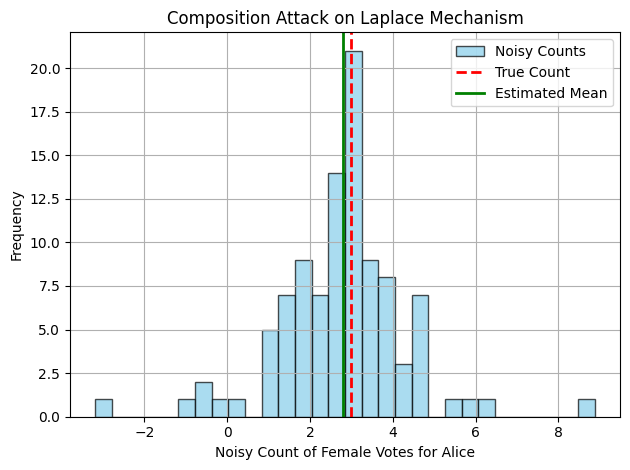

In [8]:
# Print and visualize true vs estimated count
print(f"True count: {true_count}")
print(f"Estimated count after {num_queries} queries: {estimated_count:.2f}")

plt.hist(noisy_counts, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label="Noisy Counts")
plt.axvline(true_count, color='red', linestyle='--', linewidth=2, label="True Count")
plt.axvline(estimated_count, color='green', linestyle='-', linewidth=2, label="Estimated Mean")
plt.title("Composition Attack on Laplace Mechanism")
plt.xlabel("Noisy Count of Female Votes for Alice")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()